# Matplotlib vs. Seaborn vs. Plotly

[link](https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb)

In [1]:
# import the pandas package to read my csv into an easily readable dataframe
# csv file contains the 2017 Spotify top tracks
import pandas as pd
df = pd.DataFrame(pd.read_csv('featuresdf.csv'))

In [2]:
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
# With this backend, the output of plotting commands is displayed inline within 
# frontends like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document
import matplotlib.pyplot as plt
%matplotlib inline

Plot a histogram of the danceability and energy scores overlaid

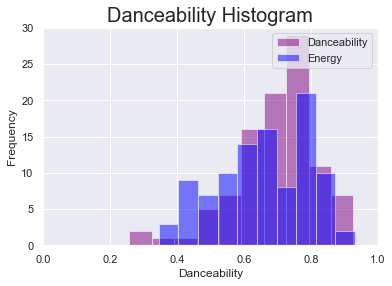

In [3]:
# apply seaborne theme (optional)
import seaborn as sns
sns.set(style='darkgrid')

# set figure
f, ax = plt.subplots(1,1)

# graph histogram
plt.hist(df['danceability'], bins=10, alpha=0.5, color='purple', label='Danceability')
plt.hist(df['energy'], bins=10, alpha = 0.5, color='blue', label='Energy')

# set legend
plt.legend(loc='upper right')

# set title & axis titles
ax.set_title('Danceability Histogram', fontsize=20)
ax.set_xlabel('Danceability')
ax.set_ylabel('Frequency')

# set x & y ranges
plt.xlim(0,1)
plt.ylim(0, 30)

plt.show()

We can also plot the same graph using what seaborn calls the distplot

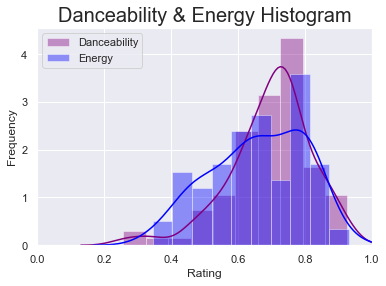

In [4]:
f, ax = plt.subplots(1,1)

sns.distplot(df['danceability'], bins=10, label='Danceability', color='purple')
sns.distplot(df['energy'], bins=10, label='Energy', color='blue')

ax.set_title('Danceability & Energy Histogram', fontsize=20)
ax.set(xlabel='Rating', ylabel='Frequency')
ax.set_xlim([0, 1])
ax.legend()

Almost exactly the same, right? Seaborn is built on matplotlib, so you can use them concurrently. Seaborn simply has its own library of graphs, and has pleasant formatting built in. However, it does not have all of the same capabilities of matplotlib. For instance, if you want to create the same histogram, but with the two variables stacked next to each other as opposed to overlaid, you would need to fall back to matplotlib:

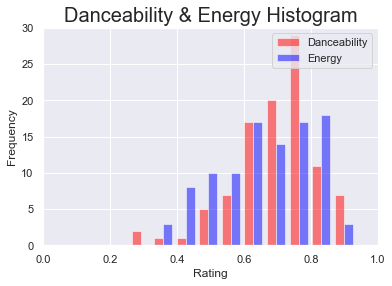

In [5]:
# set figure
f, ax = plt.subplots(1,1)

# next to each other
plt.hist([df['danceability'], df['energy']], bins=10, alpha=0.5, color=['red', 'blue'], label = ['Danceability', 'Energy'])

# set legend
plt.legend(loc='upper right')

# set title & axis titles
ax.set_title('Danceability & Energy Histogram', fontsize=20)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')

# set x & y ranges
plt.xlim(0,1)
plt.ylim(0, 30)

plt.show()

To plot the loudness score vs. valence in matplotlib:

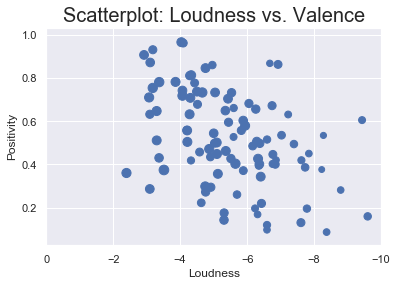

In [13]:
# set figure
f, ax = plt.subplots(1,1)

# plot
plt.scatter(df['loudness'], df['valence'], s=df['energy']*100)

#set title & labels
plt.title('Scatterplot: Loudness vs. Valence', fontsize=20)
plt.xlabel('Loudness')
plt.ylabel('Positivity')

#set x range
ax.set_xlim([0, -10])

plt.show()

In seaborn:


(0, -10)

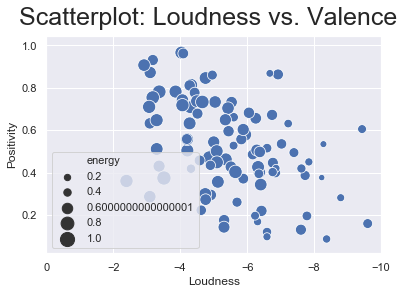

In [14]:
fig = sns.scatterplot(x=df['loudness'], y=df['valence'], size = df['energy'],sizes = (40,200))
fig.figure.suptitle("Scatterplot: Loudness vs. Valence", fontsize = 25)
fig.set(xlabel='Loudness', ylabel='Positivity')
fig.set_xlim([0,-10])

If you want to add a regression line to the graph, seaborn makes this infinitely easier with its regplot graph:

(0, -10)

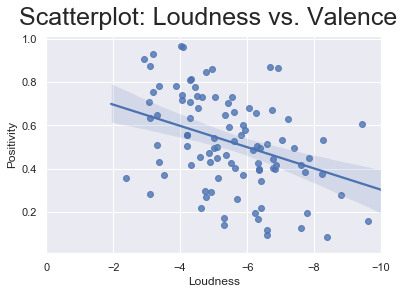

In [15]:
fig = sns.regplot(df['loudness'], y=df['valence'], data=df)
fig.figure.suptitle("Scatterplot: Loudness vs. Valence", fontsize = 25)
fig.set(xlabel='Loudness', ylabel='Positivity')
fig.set_xlim([0,-10])

To add the correlation coefficient to this, import the pearson.r package from scipy and follow the steps below:

Text(-7.5, 0.9, 'r=0.41, p=0.0')

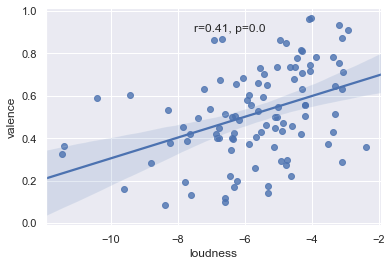

In [17]:
import numpy as np
from scipy.stats import pearsonr

#calculate correlation coefficient
corr = pearsonr(df['loudness'], df['valence'])
corr = [np.round(c, 2) for c in corr]

#add the coefficient to your graph
text = 'r=%s, p=%s' % (corr[0], corr[1])
ax = sns.regplot(x="loudness", y="valence", data=df)
ax.text(-7.5, 0.9, text, fontsize=12)

But there is a simpler method that produces superior graphs than either of these: Plotly. To get started in a jupyter notebook, run the code below:

In [7]:
# May ask for confirmation, execute in a separate window
#!pip install chart-studio
#!pip install cufflinks
#!conda install -c plotly chart-studio

# Standard plotly imports
from chart_studio.plotly import plot, iplot as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
# cufflinks integrates plotly and pandas together
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

To plot the same overlaid histogram as above using default Plotly settings:


In [12]:
fig = df[['danceability', 'energy']].iplot(
    kind='hist', 
    color=['purple', 'blue'], 
    xTitle='Danceability',
    yTitle='Frequency', 
    title='Danceability Histogram')

You can specify your desired theme from a growing list of available default themes, including one modeled after seaborn (used below).

In [8]:
#install themes & view available
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

To plot the bars side by side or otherwise further customize the graph, the code is lengthier, but fairly intuitive.

In [9]:
#plot
trace1 = go.Histogram(
    x=df['danceability'],
    name='danceability', #name used in legend and hover labels
    xbins=dict( #bins used for histogram
        start=0,
        end=10,
        size=0.1
    ),
    marker=dict(
        color='#1f77b4',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=df['energy'],
    name='energy', #name used in legend and hover labels
    xbins=dict( #bins used for histogram
        start=0,
        end=10,
        size=0.1
    ),
    marker=dict(
        color='#9467bd'
    ),
    opacity=0.75
)
data = [trace1, trace2]
layout = go.Layout(
    template='seaborn', #set theme
    title='Danceability & Energy Histogram',
    xaxis=dict(
        title='Danceability & Energy'
    ),
    yaxis=dict(
        title='Frequency'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='styled histogram')

With Plotly, we can again create a scatterplot using the default settings:

In [21]:
fig = go.Figure(data=go.Scatter(x=df['loudness'], y=df['valence'],mode='markers'))
fig.update_layout(title='Loudness vs. Valence (Positivity)')
fig.layout.template = 'seaborn'
fig.show()

By adding another trace called ‘lineOfBestFit’ and calculating the regression using numpy, we can plot the regression line:

In [35]:
dataPoints = go.Scattergl(
    x=df.loudness,
    y=df.valence,
    mode='markers',
    marker=dict(
        opacity=1,
        line=dict(
            color='white'
        )
    ),
    name='Data points'
)
data=[dataPoints]
layout.update(
    yaxis=dict(
        title='Energy'),
    xaxis=dict(
        title='Danceability'
    )
)

m,b = np.polyfit(df.loudness, df.valence, deg=1)
bestfit_y = (df.loudness * m + b)
lineOfBestFit=go.Scattergl(
    x=df.loudness,
    y=bestfit_y,
    name='Line of best fit',
    line=dict(
        color='blue',
    )
)
data=[dataPoints, lineOfBestFit]
figure = go.Figure(data=data, layout=layout)
figure.update_xaxes(autorange="reversed")
figure.layout.template = 'plotly_dark'
iplot(figure)

# Intro to Animations in Python

- [link](https://plot.ly/python/animations/)


### Animated figures with Plotly Express

Note that you should always fix the x_range and y_range to ensure that your data remains visible throughout the animation.

In [16]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

### Animated Bar Charts with Plotly Express


Note that you should always fix the y_range to ensure that your data remains visible throughout the animation.



In [18]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

### Animated figures with Graph Objects


The remainder of this section describes the low-level API for constructing animated figures manually.



Along with data and layout, frames can be added as a key in a figure object. The frames key points to a list of figures, each of which will be cycled through when animation is triggered.

You can add play and pause buttons to control your animated charts by adding an updatemenus array to the layout of your figure. More information on style and placement of the buttons is available in Plotly's updatemenus reference.

In [19]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

Moving Point on a Curve


In [20]:
import plotly.graph_objects as go
import numpy as np

# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()

Moving Frenet Frame Along a Planar Curve


In [21]:
import plotly.graph_objects as go

import numpy as np


# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2
vx = 1 + 2 * s
vy = 1 - 2 * s  # v=(vx, vy) is the velocity
speed = np.sqrt(vx ** 2 + vy ** 2)
ux = vx / speed  # (ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy = vy / speed

xend = xx + ux  # end coordinates for the unit tangent vector at (xx, yy)
yend = yy + uy

xnoe = xx - uy  # end coordinates for the unit normal vector at (xx,yy)
ynoe = yy + ux


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     name="frame",
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     name="curve",
                     mode="lines",
                     line=dict(width=2, color="blue"))
          ],
    layout=go.Layout(width=600, height=600,
                     xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title="Moving Frenet Frame Along a Planar Curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None])])]),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], xend[k], None, xx[k], xnoe[k]],
            y=[yy[k], yend[k], None, yy[k], ynoe[k]],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(N)]
)

fig.show()

Using a Slider and Buttons

The following example uses the well known Gapminder dataset to exemplify animation capabilities. This bubble chart animation shows the change in 'GDP per Capita' against the 'Life Expectancy' of several countries from the year 1952 to 2007, colored by their respective continent and sized by population.

This is also an example of building up the structure of a figure as a Python dictionary, and then constructing a graph object figure from that dictionary.

In [22]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["sliders"] = {
    "args": [
        "transition", {
            "duration": 400,
            "easing": "cubic-in-out"
        }
    ],
    "initialValue": "1952",
    "plotlycommand": "animate",
    "values": years,
    "visible": True
}
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()